# IFN703: Exploratory Data Analysis

## EDA CSV files

In [10]:
import pandas as pd
import os
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_data = pd.read_csv('./data/training.csv')
test_data = pd.read_csv('./data/testing.csv')

# Display first few rows of the training DataFrame
print("Training DataFrame:")
print(train_data.head())

# Display first few rows of the testing DataFrame
print("\nTesting DataFrame:")
print(test_data.head())

Training DataFrame:
  filename   label
0   A01823  normal
1   A05482  normal
2   A06114  normal
3   A04275  normal
4   A01157  normal

Testing DataFrame:
  filename   label
0   A02083  normal
1   A08474  normal
2   A03133  normal
3   A01743  normal
4   A06930  normal


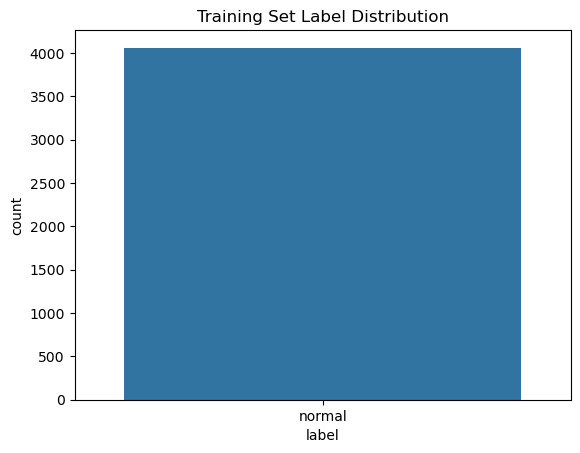

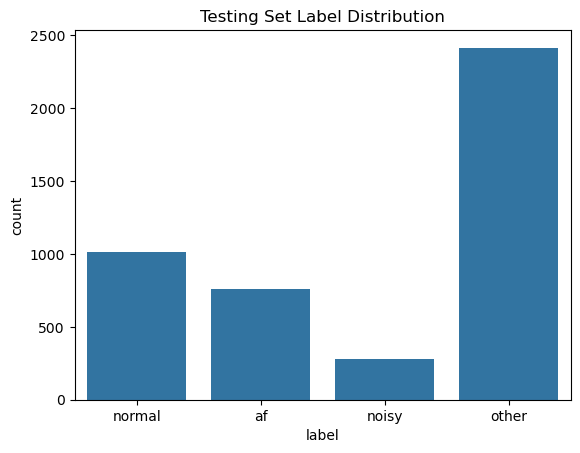

In [3]:
# Check label distribution in training set
sns.countplot(x='label', data=train_data)
plt.title('Training Set Label Distribution')
plt.show()

# Check label distribution in testing set
sns.countplot(x='label', data=test_data)
plt.title('Testing Set Label Distribution')
plt.show()

## EDA: Training and Testing folders

In [5]:
import scipy.io

# Specify the file path
file_path = "./data/training/A08218.mat"  # Replace "your_file_name.mat" with the actual file name

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)

# Print the keys in the loaded .mat file
print("Keys in the .mat file:", mat_data.keys())


Keys in the .mat file: dict_keys(['val'])


In [8]:
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('data/training/A00001.mat')

# Get the keys
keys = mat_data.keys()

# Print the keys
print("Keys in the loaded .mat file:")
for key in keys:
    print(key)


Keys in the loaded .mat file:
val


In [9]:
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat('data/training/A00001.mat')

# Access the value associated with the key 'val'
val_data = mat_data['val']

# Print the contents of the 'val' key
print("Contents of the 'val' key:")
print(val_data)


Contents of the 'val' key:
[[-127 -162 -197 ...  -18  -22  -21]]


In [21]:
import os
import wfdb
import matplotlib.pyplot as plt

signal = wfdb.rdrecord("data/training/A00001").p_signal.T
annotation = wfdb.rdann("data/training/A00001", "hea")
timestamps = annotation.sample
labels = annotation.aux_note

print(f"signal:{signal}, shape={signal.shape}")
print("---------------------------------------------------------------------------------")
print(f"timestamps:{timestamps}, len={len(timestamps)}")
print("---------------------------------------------------------------------------------")
print(f"labels:{labels}, len={len(labels)}")

signal:[[-0.127 -0.162 -0.197 ... -0.018 -0.022 -0.021]], shape=(1, 9000)
---------------------------------------------------------------------------------
timestamps:[   65   113   417   705  1505  1553  1841  1889  1937  2241  2299  2864
  3169  3457  3504  4325  4375  4423  4711  4977  5025  5073  5634  5999
  6115  6676  7231  7283  7332  7380  7683  7769  8330  8362  8650  9211
  9266  9314  9362 10199 10270], len=41
---------------------------------------------------------------------------------
labels:['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], len=41


In [23]:
import scipy.io
import numpy as np

# Load the .mat file using scipy.io.loadmat()
mat_data = scipy.io.loadmat("data/training/A00001.mat")

# Access the variables in the dictionary
# For example, to access the ECG signal data
ecg_signal = mat_data['val']

# Print the shape of the ECG signal array
print(f"ECG Signal shape: {ecg_signal.shape}")

# Access other variables if available in your .mat file
# For example, if there are annotations
if 'annotation' in mat_data:
    annotations = mat_data['annotation']
    # Process or print annotations as needed

# Continue with your analysis or visualization using the loaded data


ECG Signal shape: (1, 9000)


{'record_name': 'A00001', 'n_sig': 1, 'fs': 300, 'counter_freq': None, 'base_counter': None, 'sig_len': 9000, 'base_time': datetime.time(5, 5, 15), 'base_date': datetime.date(2000, 5, 1), 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['A00001.mat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [24], 'adc_gain': [1000.0], 'baseline': [0], 'units': ['mV'], 'adc_res': [16], 'adc_zero': [0], 'init_value': [-127], 'checksum': [0], 'block_size': [0]}


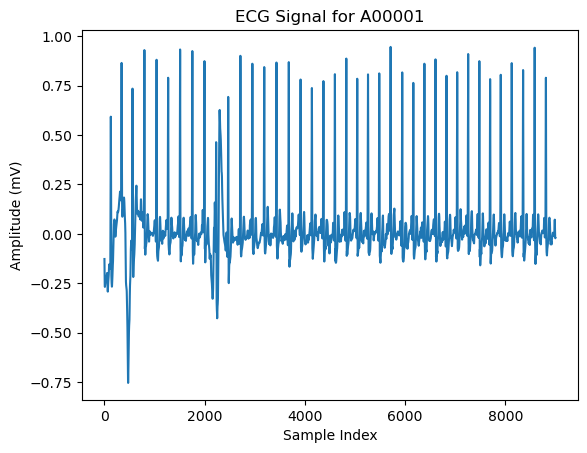

In [4]:
import wfdb
import matplotlib.pyplot as plt

# Replace 'A00001' with your actual record name
record_name = 'A00001'
record_path = f"data/training/{record_name}"

# Read the ECG signal using wfdb
record = wfdb.rdrecord(record_path)

# Extract the signal values and timestamps
signal = record.p_signal.T
timestamps = range(record.sig_len)

# Print information about the record
print(record.__dict__)

# Plot the ECG signal
plt.plot(timestamps, signal[0])  # Assuming a single lead ECG
plt.title(f"ECG Signal for {record_name}")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (mV)")
plt.show()


### Error found: No all .mat files have their respective .hea file. 

In [5]:
import os
import wfdb
import matplotlib.pyplot as plt

def load_signal_data(record_path):
    try:
        record = wfdb.rdrecord(record_path)
        signal = record.p_signal.T
        timestamps = range(record.sig_len)
        return signal, timestamps
    except Exception as e:
        print(f"Error occurred while loading record '{record_path}': {e}")
        return None, None

def plot_ecg_signal(record_name, signal, timestamps):
    plt.plot(timestamps, signal[0])  # Assuming a single lead ECG
    plt.title(f"ECG Signal for {record_name}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude (mV)")
    plt.show()

# Replace 'A00001' with your actual record name
record_name = 'A00030'
record_path = f"data/training/{record_name}"

# Load signal data
signal, timestamps = load_signal_data(record_path)

# Check if signal data is loaded successfully
if signal is not None and timestamps is not None:
    # Print information about the record
    print(wfdb.rdheader(record_path).__dict__)

    # Plot the ECG signal
    plot_ecg_signal(record_name, signal, timestamps)
else:
    print("Signal data could not be loaded.")


Error occurred while loading record 'data/training/A00030': [Errno 2] No such file or directory: '/home/n10962646/cab420/IFN703/data/training/A00030.hea'
Signal data could not be loaded.


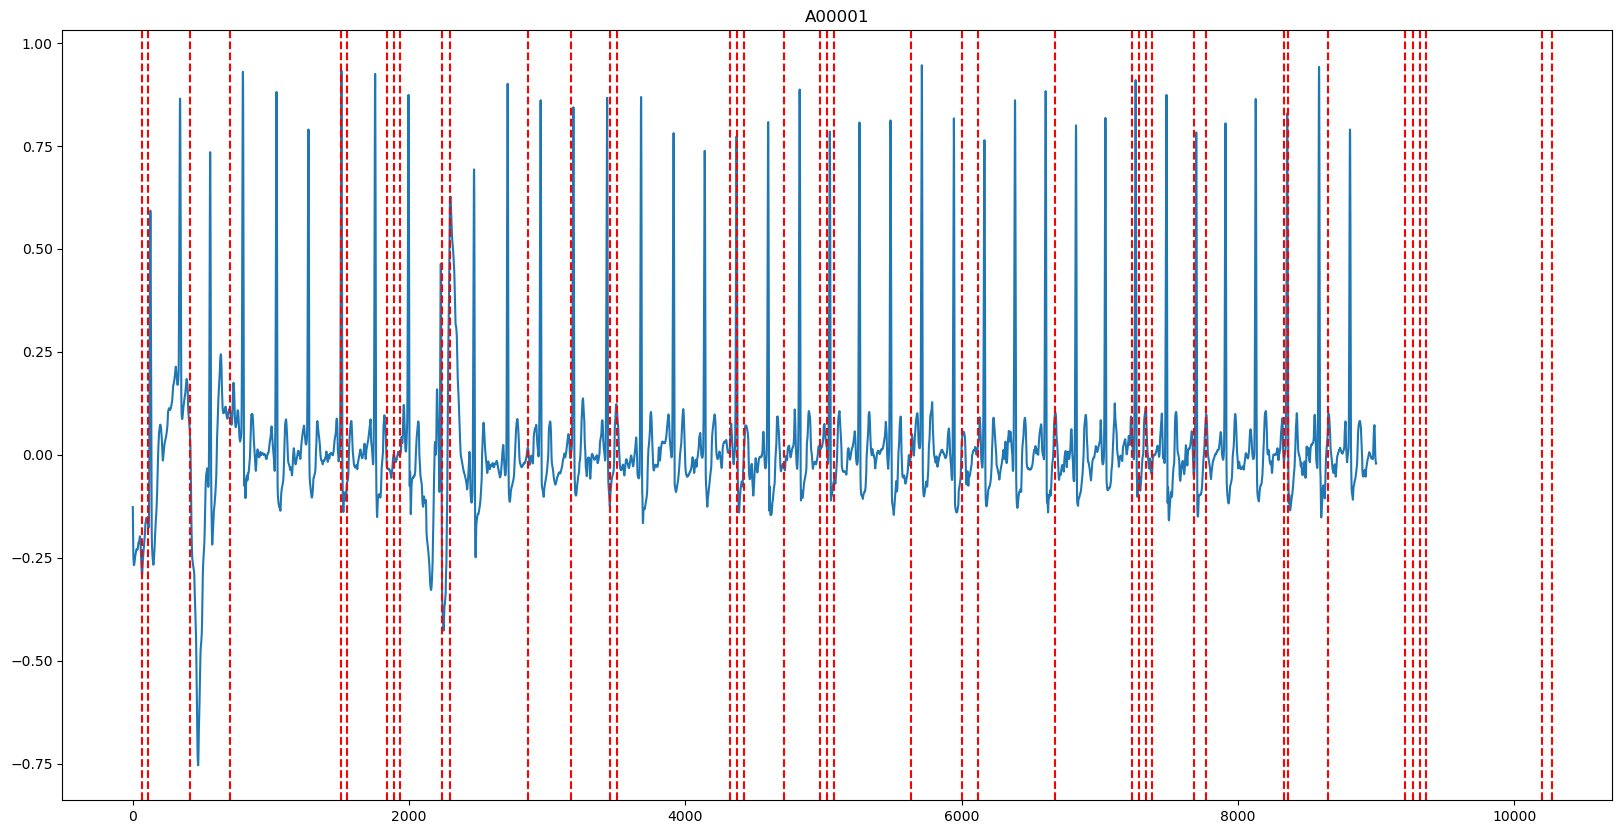

In [12]:
annotation_colors = {"":"red"}
plt.figure(figsize=(20, 10))
plt.plot(signal[0])
for timestamp, label in zip(timestamps, labels):
    plt.axvline(x=timestamp, color=annotation_colors[label], linestyle="--")
    plt.text(timestamp, 0, label, rotation=90)
plt.title("A00001")
plt.show()
plt.close()

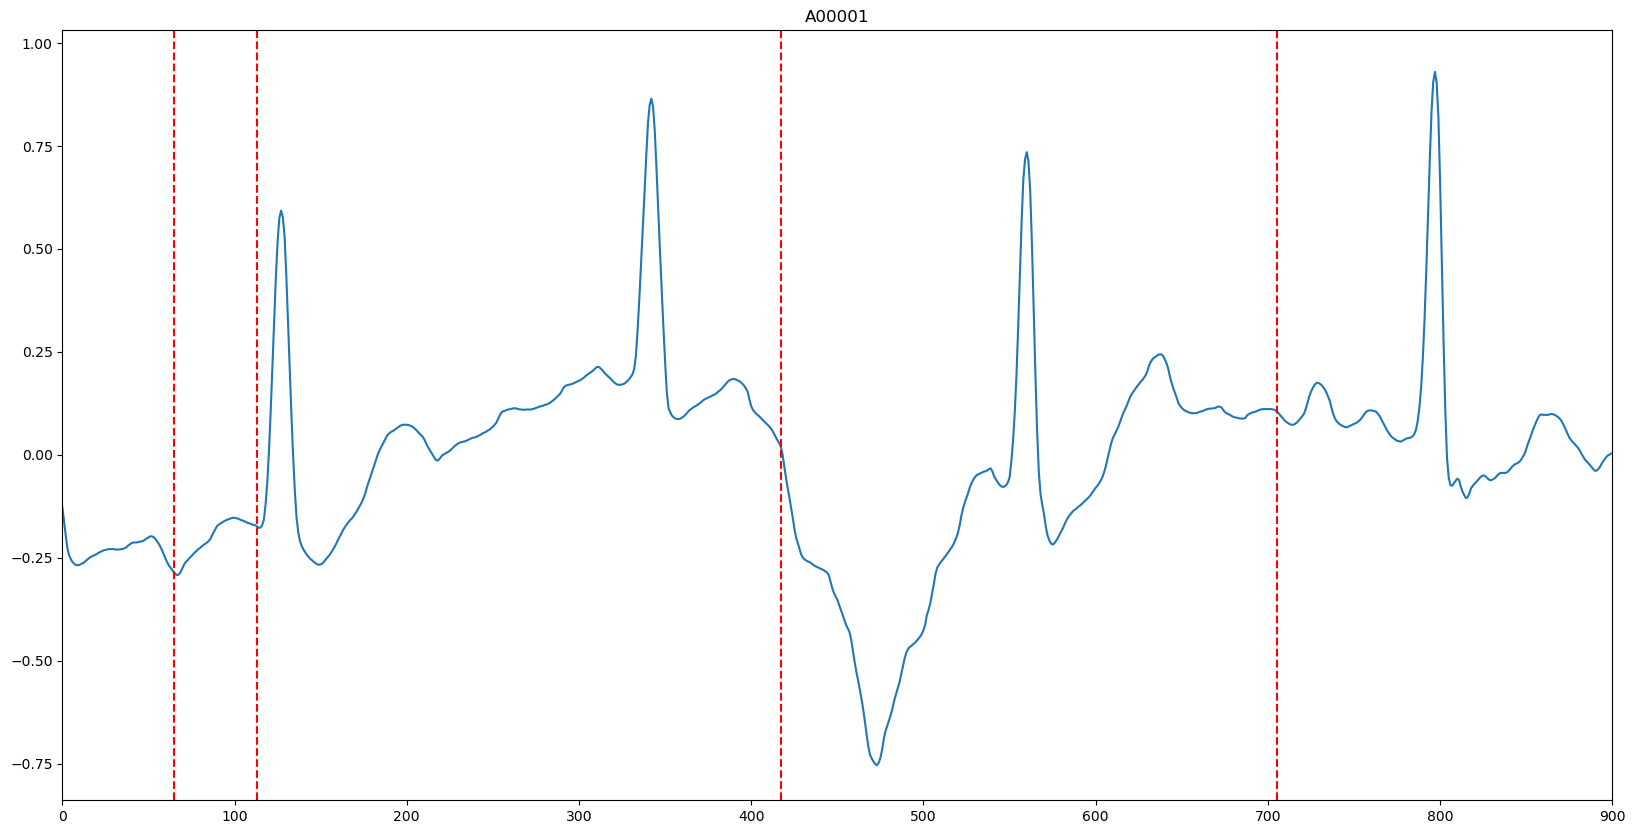

In [20]:
# Zoom in
start = int(0 * len(signal[0]))
end = int(0.10 * len(signal[0]))

plt.figure(figsize=(20, 10))
plt.plot(signal[0])
for timestamp, label in zip(timestamps, labels):
    if  not start < timestamp < end:
        continue
    plt.axvline(x=timestamp, color = annotation_colors[label], linestyle="--")
    plt.text(timestamp, 0, label, rotation=90)
plt.title("A00001")

plt.axis([start, end, None, None])
plt.show()
plt.close()

In [27]:
record = wfdb.rdrecord('./data/training/A00001', sampfrom=0, sampto=None, channels=None, physical=True, channel_names=None, warn_empty=False)


In [28]:
print(record.__dict__)

{'record_name': 'A00001', 'n_sig': 1, 'fs': 300, 'counter_freq': None, 'base_counter': None, 'sig_len': 9000, 'base_time': datetime.time(5, 5, 15), 'base_date': datetime.date(2000, 5, 1), 'comments': [], 'sig_name': ['ECG'], 'p_signal': array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['A00001.mat'], 'fmt': ['16'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [24], 'adc_gain': [1000.0], 'baseline': [0], 'units': ['mV'], 'adc_res': [16], 'adc_zero': [0], 'init_value': [-127], 'checksum': [0], 'block_size': [0]}


### Applying Multi-scale Cross-restoration to a single .mat file from the training folder

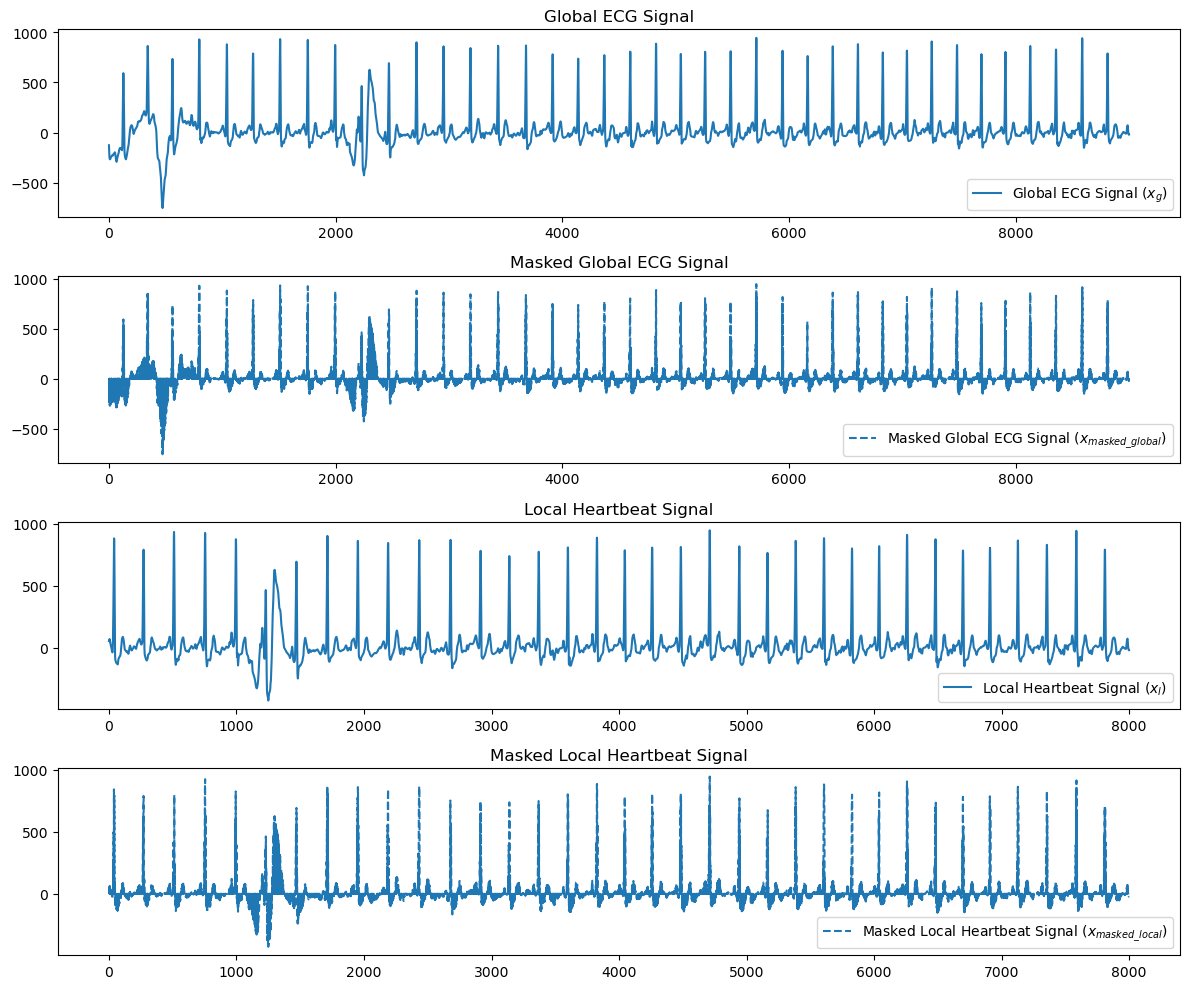

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load data from MATLAB .mat file
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]  # Extract the NumPy array

# Split the data into global ECG signal (x_g) and local heartbeat signal (x_l)
x_g = data_array[:9000]  # Assuming global ECG signal has 5000 elements
x_l = data_array[1000:]  # Assuming local heartbeat signal has 4000 elements

# Generate random masks
D = len(x_g)
d = len(x_l)
M_g = np.random.choice([0, 1], size=D)  # Global mask
M_l = np.random.choice([0, 1], size=d)  # Local mask

# Apply masks to signals
x_masked_g = x_g * M_g
x_masked_l = x_l * M_l

# Plot original and masked signals
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(x_g, label='Global ECG Signal ($x_g$)')
plt.title('Global ECG Signal')
plt.legend(loc='lower right')

plt.subplot(4, 1, 2)
plt.plot(x_masked_g, label='Masked Global ECG Signal ($x_{masked\_global}$)', linestyle='--')
plt.title('Masked Global ECG Signal')
plt.legend(loc='lower right')

plt.subplot(4, 1, 3)
plt.plot(x_l, label='Local Heartbeat Signal ($x_l$)')
plt.title('Local Heartbeat Signal')
plt.legend(loc='lower right')

plt.subplot(4, 1, 4)
plt.plot(x_masked_l, label='Masked Local Heartbeat Signal ($x_{masked\_local}$)', linestyle='--')
plt.title('Masked Local Heartbeat Signal')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


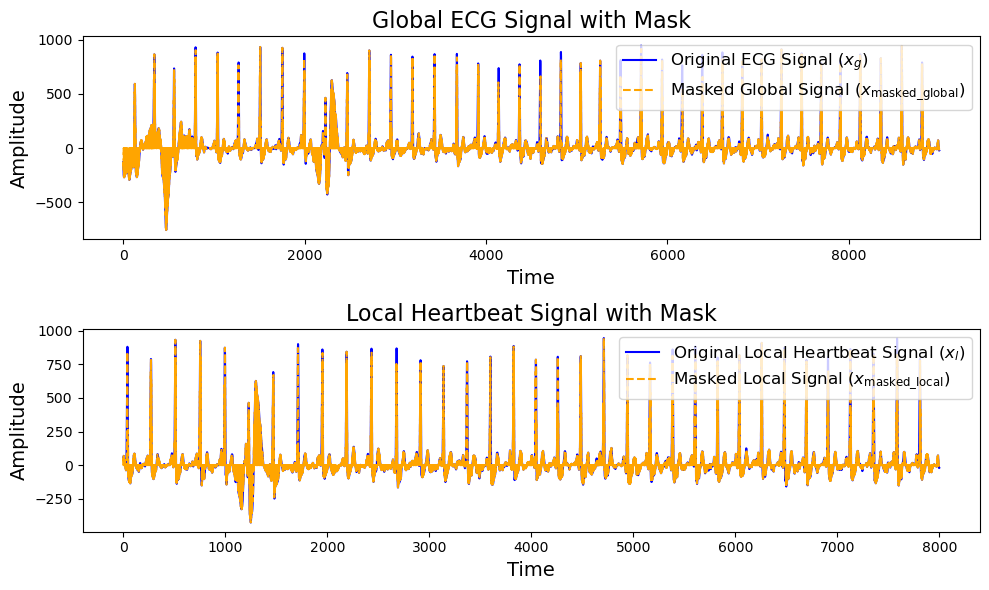

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load data from MATLAB .mat file
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]  # Extract the NumPy array

# Split the data into global ECG signal (x_g) and local heartbeat signal (x_l)
x_g = data_array[:9000]  # Assuming global ECG signal has 5000 elements
x_l = data_array[1000:]  # Assuming local heartbeat signal has 4000 elements

# Generate random masks
D = len(x_g)
d = len(x_l)
M_g = np.random.choice([0, 1], size=D)  # Global mask
M_l = np.random.choice([0, 1], size=d)  # Local mask

# Apply masks to signals
x_masked_g = x_g * M_g
x_masked_l = x_l * M_l

# Plot original and masked signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x_g, label='Original ECG Signal ($x_g$)', color='blue')
plt.plot(x_masked_g, label='Masked Global Signal ($x_{\mathrm{masked\_global}}$)', linestyle='--', color='orange')
plt.title('Global ECG Signal with Mask', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(2, 1, 2)
plt.plot(x_l, label='Original Local Heartbeat Signal ($x_l$)', color='blue')
plt.plot(x_masked_l, label='Masked Local Signal ($x_{\mathrm{masked\_local}}$)', linestyle='--', color='orange')
plt.title('Local Heartbeat Signal with Mask', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


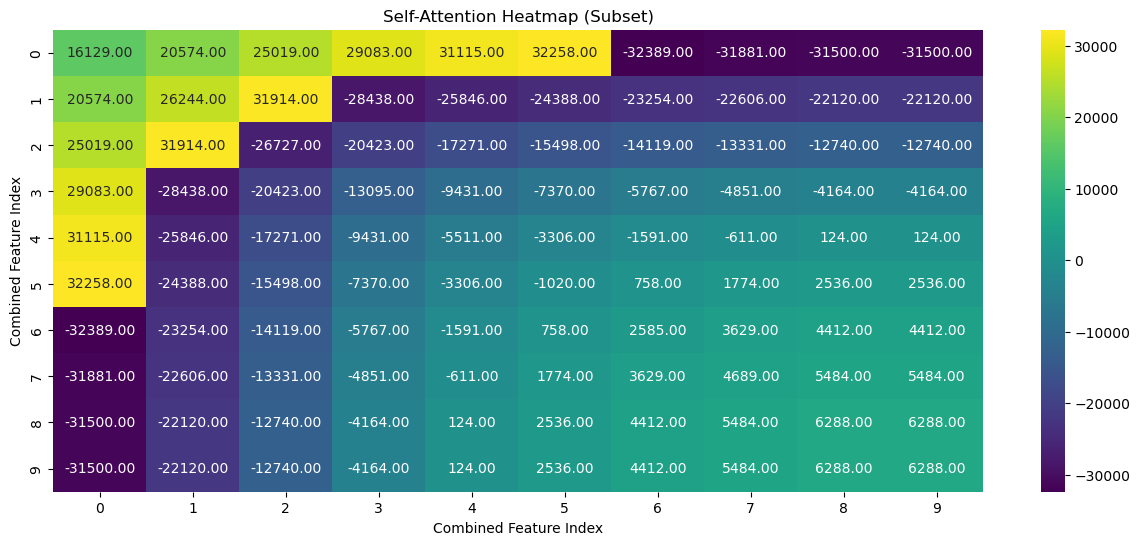

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat


# Load data from MATLAB .mat file
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]  # Extract the NumPy array

# Use a portion of the array to avoid delays (e.g., first 100 elements)
subset_array = data_array[:10]

# Concatenate global and local features
combined_feature = np.concatenate([subset_array[:5], subset_array[5:]])

# Compute self-attention scores
attention_scores = np.outer(combined_feature, combined_feature)

# Plot the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(attention_scores, cmap='viridis', annot=True, fmt=".2f")
plt.title('Self-Attention Heatmap (Subset)')
plt.xlabel('Combined Feature Index')
plt.ylabel('Combined Feature Index')
plt.show()


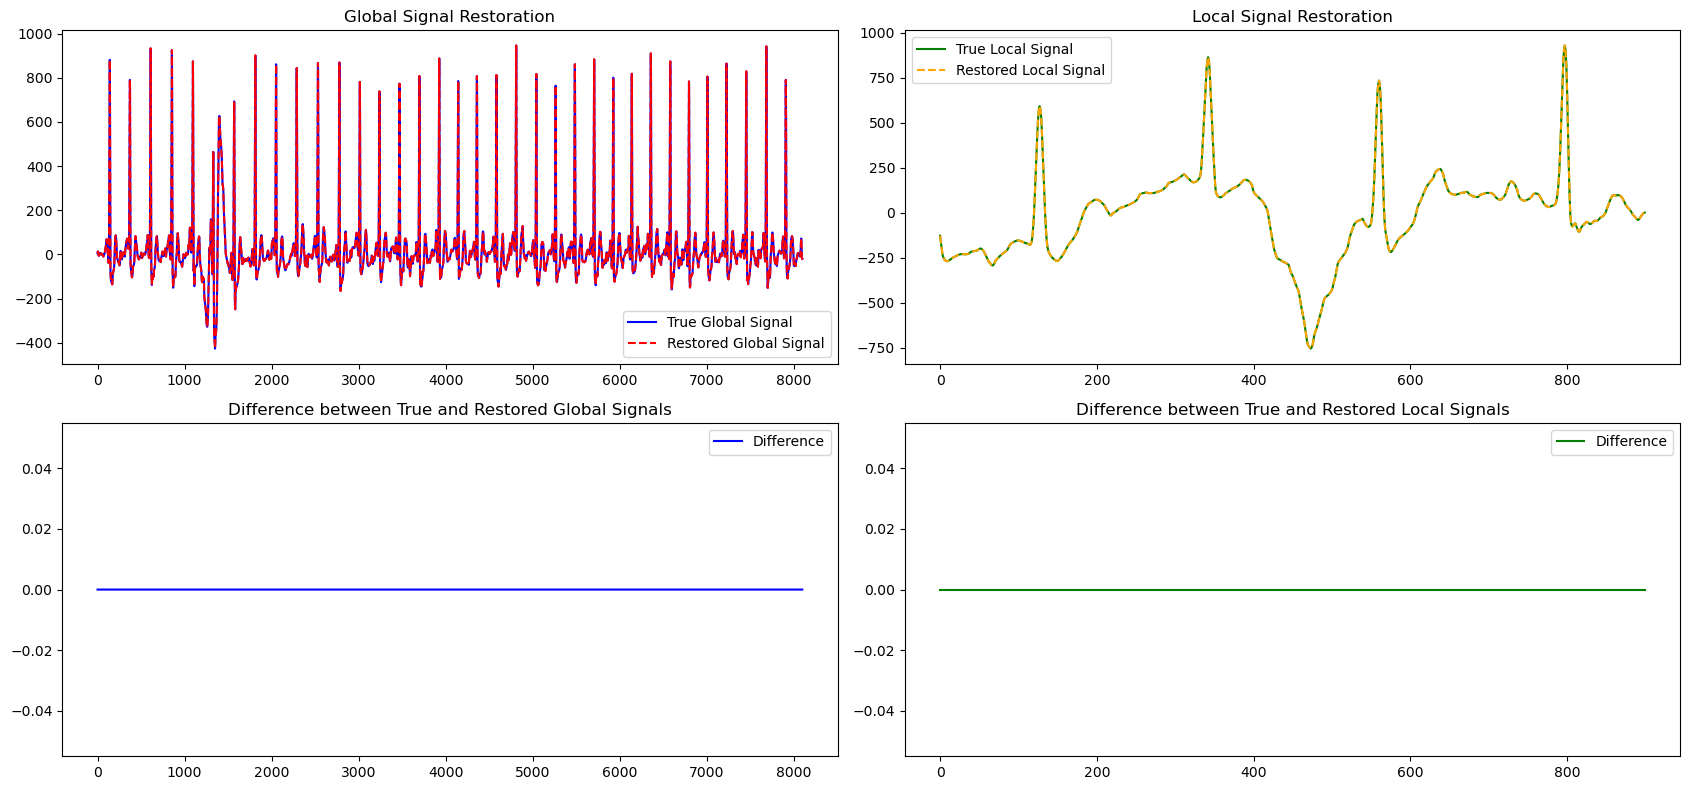

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the uncertainty-aware restoration loss
def uncertainty_aware_restoration_loss(true_signal, restored_signal, uncertainty):
    loss = np.mean((np.square(true_signal - restored_signal) / uncertainty) + np.log(uncertainty))
    return loss

# Define the restoration function
def restore_signal(signal, uncertainty):
    # For illustration purposes, simply copying the signal as restored signal
    restored_signal = np.copy(signal)
    return restored_signal

# Load the .mat file (make sure to have scipy installed)
from scipy.io import loadmat

# Load the data
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]

# Split the data array into global and local signals
signal_length = len(data_array)
split_length = int(signal_length * 0.1)
local_signal = data_array[:split_length]
global_signal = data_array[split_length:]

# Generate some random uncertainties for demonstration
local_uncertainty = np.random.rand(split_length)
global_uncertainty = np.random.rand(signal_length - split_length)

# Restore the global and local signals
restored_global_signal = restore_signal(global_signal, global_uncertainty)
restored_local_signal = restore_signal(local_signal, local_uncertainty)

# Calculate the differences between true and restored signals
global_difference = global_signal - restored_global_signal
local_difference = local_signal - restored_local_signal

# Plotting
plt.figure(figsize=(17, 8))

# Global Signal Restoration Plot
plt.subplot(2, 2, 1)
plt.plot(global_signal, label='True Global Signal', color='blue')
plt.plot(restored_global_signal, label='Restored Global Signal', linestyle='--', color='red')
plt.title('Global Signal Restoration')
plt.legend()

# Local Signal Restoration Plot
plt.subplot(2, 2, 2)
plt.plot(local_signal, label='True Local Signal', color='green')
plt.plot(restored_local_signal, label='Restored Local Signal', linestyle='--', color='orange')
plt.title('Local Signal Restoration')
plt.legend()

# Difference Plot for Global Signal
plt.subplot(2, 2, 3)
plt.plot(global_difference, label='Difference', color='blue')
plt.title('Difference between True and Restored Global Signals')
plt.legend()

# Difference Plot for Local Signal
plt.subplot(2, 2, 4)
plt.plot(local_difference, label='Difference', color='green')
plt.title('Difference between True and Restored Local Signals')
plt.legend()

plt.tight_layout()
plt.show()


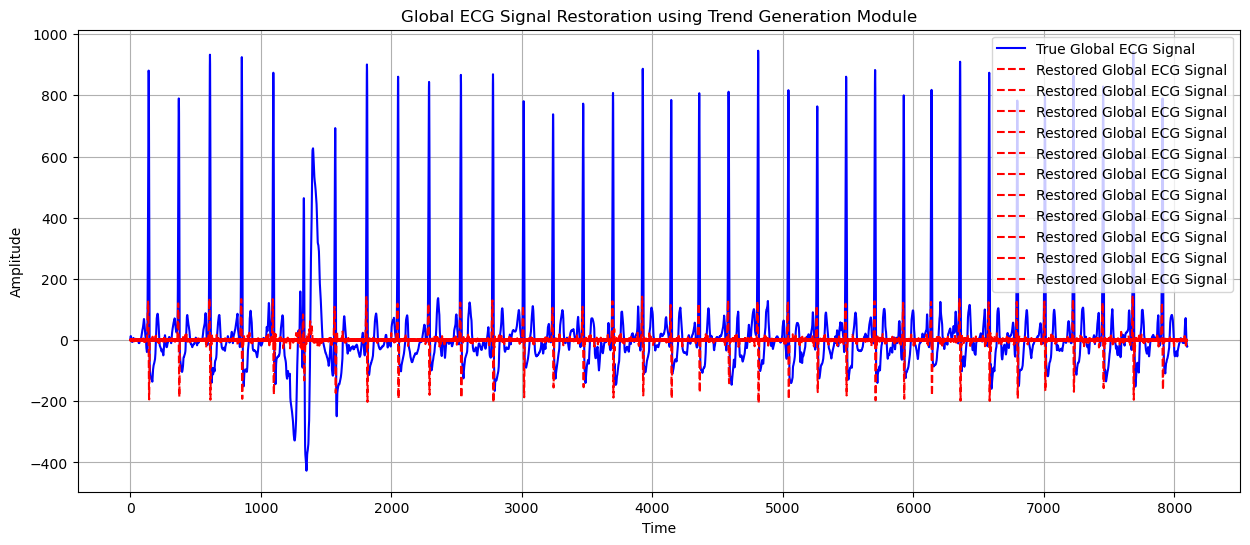

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate smooth trend from the input signal
def generate_smooth_trend(signal):
    smooth_trend = np.diff(signal)  # Compute the difference between adjacent time-series signal points
    return smooth_trend

# Function to define the autoencoder architecture
class Autoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.encoder = self.build_encoder()
        self.decoder = self.build_decoder()

    def build_encoder(self):
        # Define encoder layers (for simplicity, a linear encoder is used)
        encoder = lambda x: x
        return encoder

    def build_decoder(self):
        # Define decoder layers (for simplicity, a linear decoder is used)
        decoder = lambda x: x
        return decoder

# Concatenate encoded trend information with global features and reconstruct global ECG signal
def restore_global_signal(encoded_trend, global_features, autoencoder):
    # Reshape encoded trend to match the dimensions for concatenation
    encoded_trend_reshaped = encoded_trend.reshape(-1, 1)
    # Concatenate encoded trend with global features
    concatenated_input = np.concatenate((encoded_trend_reshaped, global_features), axis=1)
    # Restore the global signal using the autoencoder decoder
    restored_signal = autoencoder.decoder(concatenated_input)
    return restored_signal

# Load the .mat file (make sure to have scipy installed)
from scipy.io import loadmat

# Load the data
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]

# Determine the length of the signal
signal_length = len(data_array)

# Calculate the indices for splitting
split_length = int(signal_length * 0.1)

# Split the data array into local and global signals
local_signal = data_array[:split_length]
global_signal = data_array[split_length:]

# Generate smooth trend from the global signal
smooth_trend = generate_smooth_trend(global_signal)

# Define autoencoder parameters
input_dim = len(smooth_trend)
latent_dim = 10  # Adjust as needed

# Create and initialize the autoencoder
autoencoder = Autoencoder(input_dim, latent_dim)

# Dummy global features (replace with actual features if available)
global_features = np.random.randn(len(smooth_trend), latent_dim)

# Restore the global ECG signal using TGM
restored_signal = restore_global_signal(smooth_trend, global_features, autoencoder)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(global_signal, label='True Global ECG Signal', color='blue')
plt.plot(restored_signal, label='Restored Global ECG Signal', linestyle='--', color='red')
plt.title('Global ECG Signal Restoration using Trend Generation Module')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


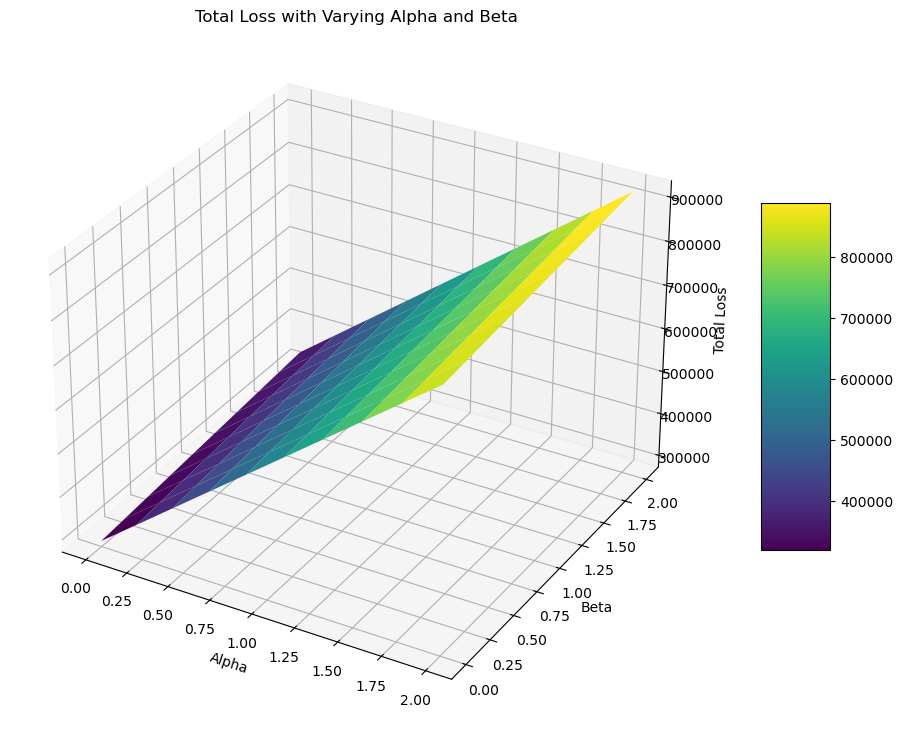

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the .mat file (make sure to have scipy installed)
from scipy.io import loadmat

# Load the data
mat_data = loadmat('data/training/A00001.mat')
data_array = mat_data['val'][0]

# Determine the length of the signal
signal_length = len(data_array)

# Calculate the indices for splitting
split_length = int(signal_length * 0.1)

# Split the data array into local and global signals
local_signal = data_array[:split_length]
global_signal = data_array[split_length:]

# Dummy values for uncertainties (replace with actual values if available)
global_uncertainty = np.random.rand(len(global_signal))
local_uncertainty = np.random.rand(len(local_signal))

# Dummy values for restored signals (replace with actual restored signals)
restored_global_signal = np.random.rand(len(global_signal))
restored_local_signal = np.random.rand(len(local_signal))
restored_trend_signal = np.random.rand(len(global_signal))

# Define the loss function
def loss_function(true_signal, restored_signal, uncertainty):
    loss = np.mean(np.square(true_signal - restored_signal) / uncertainty + np.log(uncertainty))
    return loss

# Calculate losses
alpha = 1.0  # Trade-off parameter for local restoration loss
beta = 1.0   # Trade-off parameter for trend restoration loss

global_loss = loss_function(global_signal, restored_global_signal, global_uncertainty)
local_loss = loss_function(local_signal, restored_local_signal, local_uncertainty)
trend_loss = loss_function(global_signal, restored_trend_signal, np.ones_like(global_signal))  # Assuming no uncertainty for trend

# Create meshgrid for plotting
alpha_range = np.linspace(0, 2, 10)
beta_range = np.linspace(0, 2, 10)
alpha_mesh, beta_mesh = np.meshgrid(alpha_range, beta_range)

# Calculate total loss for different combinations of alpha and beta
total_loss_mesh = global_loss + alpha_mesh * local_loss + beta_mesh * trend_loss

# Plotting 3D surface
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(alpha_mesh, beta_mesh, total_loss_mesh, cmap='viridis', edgecolor='none')
ax.set_title('Total Loss with Varying Alpha and Beta')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Total Loss')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
